# ***Brazilian E-Commerce (Olist)***

# **Objective:**
The goal of this EDA is to understand customer behavior, analyze the order lifecycle and delivery performance, evaluate customer satisfaction through reviews, and extract actionable business insights to improve operations and customer experience. To achieve this, we use Logistic Regression for predicting binary outcomes like delivery delays and Random Forest to capture complex patterns in the data, providing accurate and reliable insights into customer behavior and operational performance.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
customers = pd.read_csv("olist_customers_dataset.csv")
orders = pd.read_csv("olist_orders_dataset.csv")
reviews = pd.read_csv("olist_order_reviews_dataset.csv", engine='python', on_bad_lines='skip')

In [7]:
customers.head(3)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP


In [8]:
print("Customers dataset:", customers.shape)

Customers dataset: (99441, 5)


In [9]:
orders.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00


In [10]:
print("Orders dataset:", orders.shape)

Orders dataset: (99441, 8)


In [11]:
reviews.head(3)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24


In [12]:
print("Reviews dataset:", reviews.shape)

Reviews dataset: (99224, 7)


**Initial Data Inspection (Why?)**

Data inspection helps understand the dataset’s structure, data types, missing values, and basic statistics before analysis.

In [13]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [14]:
customers.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


In [15]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [16]:
orders.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,2018-08-02 12:06:07,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-14 20:02:44,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


In [17]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [18]:
reviews.describe()

,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


## **Data Cleaning**

**Handling Missing Values (Why?)**

Missing values can:

Distort analysis, Break visualizations, Affect feature extraction

In [19]:
customers.isna().sum()

,0
customer_id,0
customer_unique_id,0
customer_zip_code_prefix,0
customer_city,0
customer_state,0


In [20]:
orders.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,160
order_delivered_carrier_date,1783
order_delivered_customer_date,2965
order_estimated_delivery_date,0


In [21]:
reviews.isna().sum()

,0
review_id,0
order_id,0
review_score,0
review_comment_title,87656
review_comment_message,58247
review_creation_date,0
review_answer_timestamp,0


**=> Observations:**

Reviews may have missing comments

Some orders may not yet be delivered

**=> Decision:**

Keep missing review text (not needed for numeric EDA)

Keep orders with missing delivery dates (important operational insight)

Did not remove missing values; instead, we retained them because they represent valid real-world situations (such as undelivered orders or missing review comments), and removing them could lead to loss of important business insights and bias the analysis.

............

**Date Conversion (Why?)**

Dates are needed for:

Delivery time calculation, Trend analysis

In [22]:
date_cols = [
    'order_purchase_timestamp',
    'order_delivered_customer_date',
    'order_estimated_delivery_date'
]

for col in date_cols:
    orders[col] = pd.to_datetime(orders[col])

# ***Feature Extraction***

**Delivery Time (Days)** [Why?]

Delivery speed strongly impacts customer satisfaction

In [23]:
orders['delivery_time'] = (
    orders['order_delivered_customer_date'] -
    orders['order_purchase_timestamp']
).dt.days

**Delay Indicator** (Why?)

To identify late deliveries

In [24]:
orders['is_delayed'] = (
    orders['order_delivered_customer_date'] >
    orders['order_estimated_delivery_date']
)

**Review Length (Why?)**

Longer reviews often indicate strong emotions (very happy or very unhappy)

In [25]:
reviews['review_length'] = reviews['review_comment_message'].astype(str).apply(len)

# **Merge Datasets**

**Why?**

EDA becomes meaningful when customer behavior, order status, and reviews are connected.

In [26]:
orders_customers = pd.merge(
    orders, customers, on='customer_id', how='inner'
)

full_data = pd.merge(
    orders_customers, reviews, on='order_id', how='left'
)

In [27]:
full_data.head(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,is_delayed,...,customer_zip_code_prefix,customer_city,customer_state,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,review_length
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0,False,...,3149,sao paulo,SP,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,170.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,13.0,False,...,47813,barreiras,BA,8d5266042046a06655c8db133d120ba5,4.0,Muito boa a loja,Muito bom o produto.,2018-08-08 00:00:00,2018-08-08 18:37:50,20.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.0,False,...,75265,vianopolis,GO,e73b67b67587f7644d5bd1a52deb1b01,5.0,NaN,NaN,2018-08-18 00:00:00,2018-08-22 19:07:58,3.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,13.0,False,...,59296,sao goncalo do amarante,RN,359d03e676b3c069f62cadba8dd3f6e8,5.0,NaN,O produto foi exatamente o que eu esperava e e...,2017-12-03 00:00:00,2017-12-05 19:21:58,105.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2.0,False,...,9195,santo andre,SP,e50934924e227544ba8246aeb3770dd4,5.0,NaN,NaN,2018-02-17 00:00:00,2018-02-18 13:02:51,3.0


In [28]:
full_data.describe()

,order_purchase_timestamp,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,customer_zip_code_prefix,review_score,review_length
count,99992,97005,99992,97005.000000,99992.000000,99224.000000,99224.000000
mean,2017-12-31 01:03:16.518251264,2018-01-14 04:26:12.785743104,2018-01-23 19:42:38.220657664,12.100015,35140.655892,4.086421,30.106698
min,2016-09-04 21:15:19,2016-10-11 13:46:32,2016-09-30 00:00:00,0.000000,1003.000000,1.000000,1.000000
25%,2017-09-12 08:42:07,2017-09-25 20:06:58,2017-10-03 00:00:00,6.000000,11347.000000,4.000000,3.000000
50%,2018-01-18 16:44:29,2018-02-02 16:06:39,2018-02-15 00:00:00,10.000000,24416.000000,5.000000,3.000000
75%,2018-05-04 09:51:55,2018-05-15 20:02:44,2018-05-25 00:00:00,15.000000,58900.000000,5.000000,42.000000
max,2018-10-17 17:30:18,2018-10-17 13:22:46,2018-11-12 00:00:00,209.000000,99990.000000,5.000000,208.000000
std,NaN,NaN,NaN,9.547959,29800.056938,1.347579,47.349329


# **Univariate Analysis**

**Order Status Distribution**

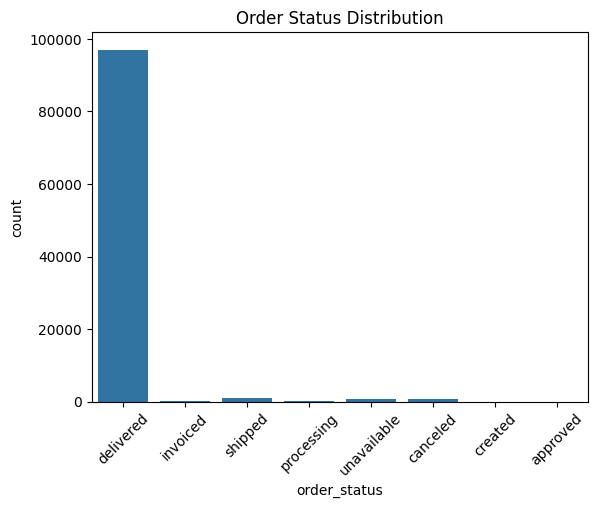

In [29]:
sns.countplot(data=full_data, x='order_status')
plt.title("Order Status Distribution")
plt.xticks(rotation=45)
plt.show()

**Graph Explanation:**

This graph shows that most orders are successfully delivered. However, a noticeable number of orders are canceled or unavailable, indicating potential issues in order fulfillment or inventory management.

**Review Score Distribution**

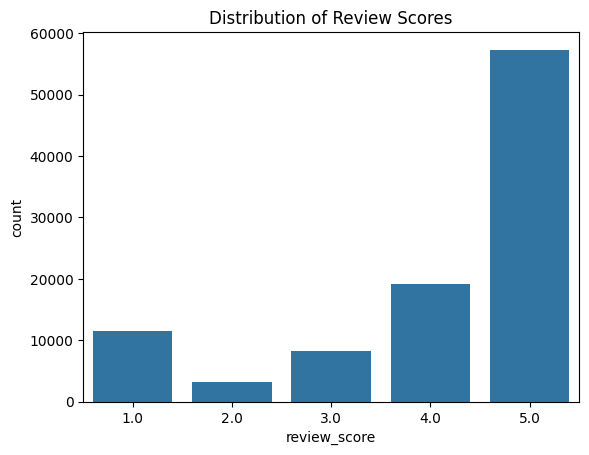

In [30]:
sns.countplot(data=full_data, x='review_score')
plt.title("Distribution of Review Scores")
plt.show()

**Graph Explanation:**

The distribution is skewed towards higher ratings, indicating overall customer satisfaction. However, the presence of low ratings suggests that certain customers experience dissatisfaction that should be investigated.

**................**

# **Bivariate Analysis**

**Delivery Time vs Review Score**

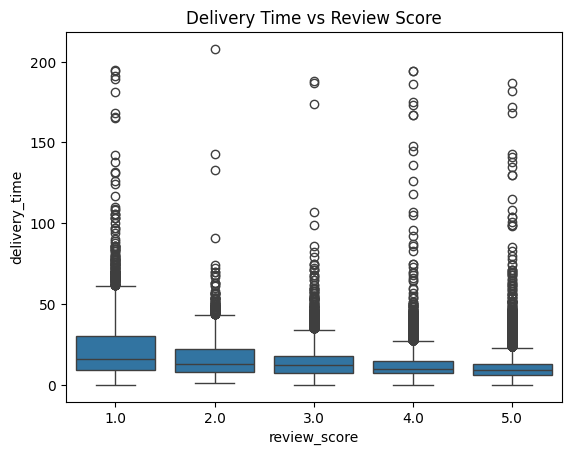

In [31]:
sns.boxplot(data=full_data, x='review_score', y='delivery_time')
plt.title("Delivery Time vs Review Score")
plt.show()

**Graph Explanation:**

Customers who gave lower review scores experienced longer delivery times. This indicates a strong negative relationship between delivery delay and customer satisfaction.

**Delayed Orders vs Reviews**

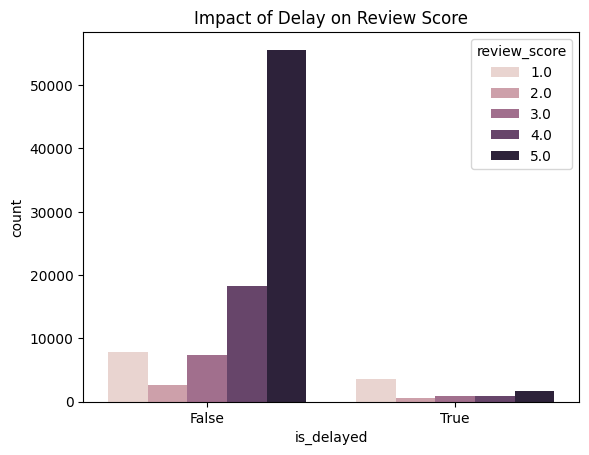

In [32]:
sns.countplot(data=full_data, x='is_delayed', hue='review_score')
plt.title("Impact of Delay on Review Score")
plt.show()

**Graph Explanation:**

Delayed orders receive a higher proportion of low ratings. This highlights delivery punctuality as a critical factor in customer satisfaction.

**...........**

# **Geographical Analysis**

**Orders by State**

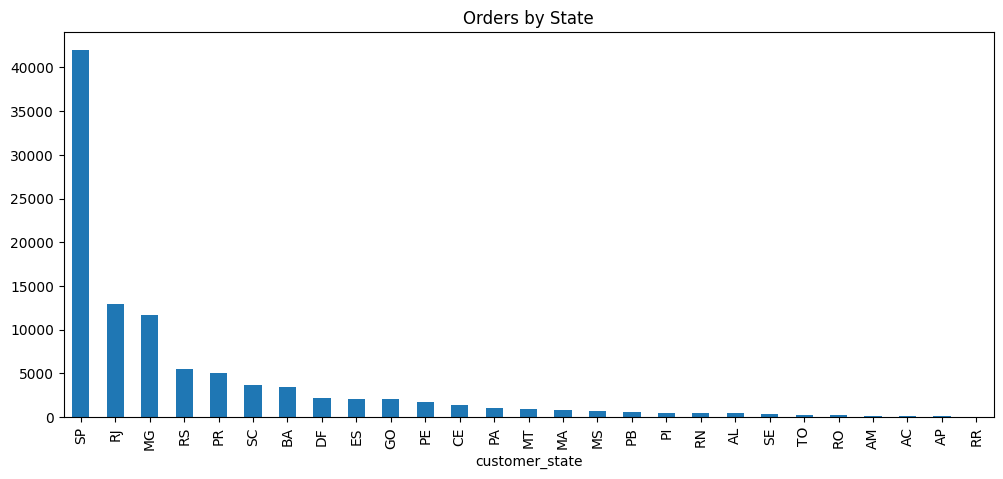

In [33]:
state_orders = full_data['customer_state'].value_counts()

state_orders.plot(kind='bar', figsize=(12,5))
plt.title("Orders by State")
plt.show()

**Graph Explanation:**

Certain states contribute significantly more orders, suggesting key regional markets. These regions should be prioritized for logistics optimization and marketing efforts.

**..............**

# **Multivariate Insights**

**Average Review Score by State**

In [34]:
full_data.groupby('customer_state')['review_score'].mean().sort_values(ascending=False)

,review_score
customer_state,
AP,4.194030
AM,4.183673
PR,4.180032
SP,4.173951
MG,4.136172
RS,4.133321
MS,4.118785
RN,4.105809
MT,4.102990


**Interpretation:**

Some states consistently give lower ratings

Could indicate regional delivery issues or service gaps

..................

# **Heatmap (Correlation Analysis)**
Why Heatmap?

To understand relationships between numerical features

Helps decide which features are useful for modeling

Detects multicollinearity

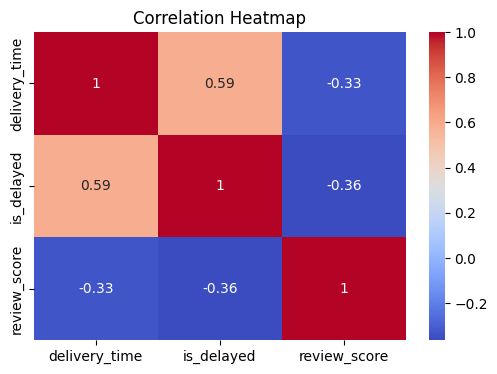

In [35]:
# Select relevant numerical columns for correlation analysis
correlation_data = full_data[['delivery_time', 'is_delayed', 'review_score']].copy()

# Drop rows with NaN values in these columns to ensure accurate correlation calculation
correlation_data.dropna(inplace=True)

corr = correlation_data.corr()

plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

**Heatmap Explanation:**

The heatmap shows the correlation between delivery time, delivery delay, and review score. A negative correlation is observed between delivery time and review score, indicating that longer delivery times tend to result in lower customer ratings. This confirms that delivery performance is a key driver of customer satisfaction.

...........

# **Line Chart (Trend Analysis)**
Why Line Chart?

Used to analyze time-based trends

Helps understand seasonality or behavior over time

**Average Review Score Over Time**

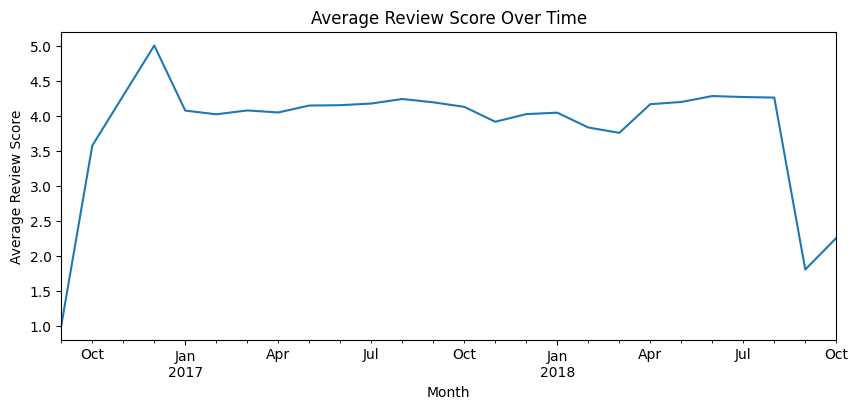

In [36]:
full_data['order_month'] = full_data['order_purchase_timestamp'].dt.to_period('M')

monthly_reviews = full_data.groupby('order_month')['review_score'].mean()

monthly_reviews.plot(figsize=(10,4))
plt.title("Average Review Score Over Time")
plt.xlabel("Month")
plt.ylabel("Average Review Score")
plt.show()

**Line Chart Explanation:**

The line chart shows fluctuations in average customer review scores over time. Periods of declining scores may indicate operational issues such as increased delivery delays or high order volumes. This analysis helps identify when service quality needs attention.

............

**Delivery Time vs Review Score**

/tmp/ipython-input-2755481197.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_reviews_bin = full_data.groupby('delivery_bin')['review_score'].mean()


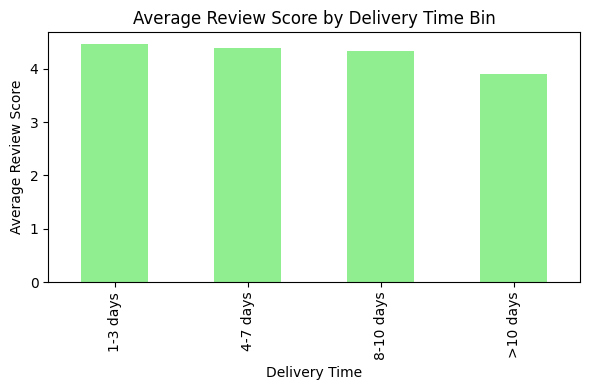

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

# Create delivery time bins
bins = [0, 3, 7, 10, full_data['delivery_time'].max()]
labels = ['1-3 days', '4-7 days', '8-10 days', '>10 days']
full_data['delivery_bin'] = pd.cut(full_data['delivery_time'], bins=bins, labels=labels, include_lowest=True)

# Compute average review score per bin
avg_reviews_bin = full_data.groupby('delivery_bin')['review_score'].mean()

# Simple bar plot
avg_reviews_bin.plot(kind='bar', figsize=(6,4), color='lightgreen')
plt.xlabel("Delivery Time")
plt.ylabel("Average Review Score")
plt.title("Average Review Score by Delivery Time Bin")
plt.tight_layout()
plt.show()


**The bar chart shows the average review scores for orders grouped by delivery time categories: 1–3 days, 4–7 days, 8–10 days, and more than 10 days. It clearly shows that faster deliveries receive higher review scores, while longer delivery times lead to lower customer satisfaction. Orders delivered in 1–3 days have the highest average ratings, and those taking more than 10 days have the lowest, highlighting that delivery speed directly impacts customer experience. This insight suggests that improving logistics for delayed orders can significantly enhance customer satisfaction and positive reviews.**

...........

# **Bar Chart (Categorical Comparison)**
Why Bar Chart?

Best for comparing categories

Easy for business stakeholders to understand

**Delayed vs Non-Delayed Orders**

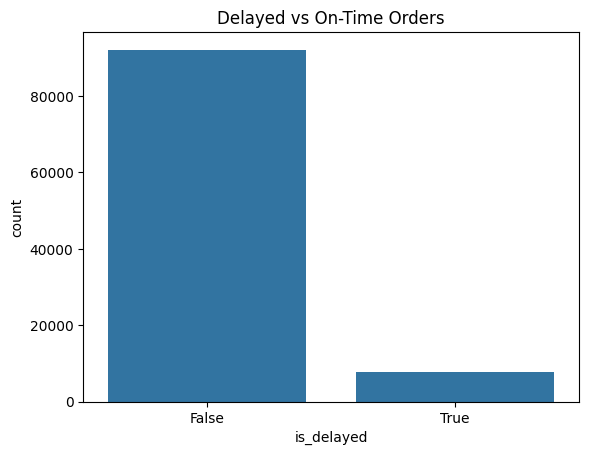

In [38]:
sns.countplot(data=full_data, x='is_delayed')
plt.title("Delayed vs On-Time Orders")
plt.show()

**Bar Chart Explanation:**

The bar chart highlights the proportion of delayed versus on-time deliveries. A significant number of delayed orders suggests opportunities to improve logistics efficiency.

...........

# **Insights**


*   The analysis combined customers, orders, and reviews datasets to understand Brazilian e-commerce behavior.
*   Delivery time and delays are the main factors affecting customer satisfaction; longer delivery → lower review scores.
*   Most orders are delivered successfully, but canceled and delayed orders highlight operational inefficiencies.
*   Regional patterns show some states have higher order volumes and differing satisfaction levels, suggesting targeted logistics improvements.
*   Customer reviews are generally positive, but low ratings and long reviews indicate areas needing attention.
*   Overall, improving delivery speed, reliability, and handling delays can significantly enhance customer experience and retention.

# **Customer Segmentation (Unsupervised)**

KMeans on RFM

Business use: marketing & personalization

In [39]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [40]:
payments = pd.read_csv("olist_order_payments_dataset.csv", engine='python', on_bad_lines='skip')

In [41]:
payments.head(3)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71


In [42]:
payments.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


In [43]:
payments.shape

(103886, 5)

In [44]:
customers.isna().sum()

,0
customer_id,0
customer_unique_id,0
customer_zip_code_prefix,0
customer_city,0
customer_state,0


In [45]:
# Merge customers and orders
cust_orders = pd.merge(orders, customers, on='customer_id', how='left')

# Merge payments
data = pd.merge(cust_orders, payments, on='order_id', how='left')

In [46]:
# Convert date column
data['order_purchase_timestamp'] = pd.to_datetime(data['order_purchase_timestamp'])

# Keep only delivered orders
data = data[data['order_status'] == 'delivered']


In [47]:
reference_date = data['order_purchase_timestamp'].max() + pd.Timedelta(days=1)

In [48]:
rfm = data.groupby('customer_unique_id').agg({
    'order_purchase_timestamp': lambda x: (reference_date - x.max()).days,
    'order_id': 'nunique',
    'payment_value': 'sum'
}).reset_index()

rfm.columns = ['customer_unique_id', 'Recency', 'Frequency', 'Monetary']

rfm.head()

,customer_unique_id,Recency,Frequency,Monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,112,1,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,115,1,27.19
2,0000f46a3911fa3c0805444483337064,537,1,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,321,1,43.62
4,0004aac84e0df4da2b147fca70cf8255,288,1,196.89


In [49]:
rfm['Monetary'] = np.log1p(rfm['Monetary'])
rfm['Frequency'] = np.log1p(rfm['Frequency'])

In [50]:
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm[['Recency', 'Frequency', 'Monetary']])

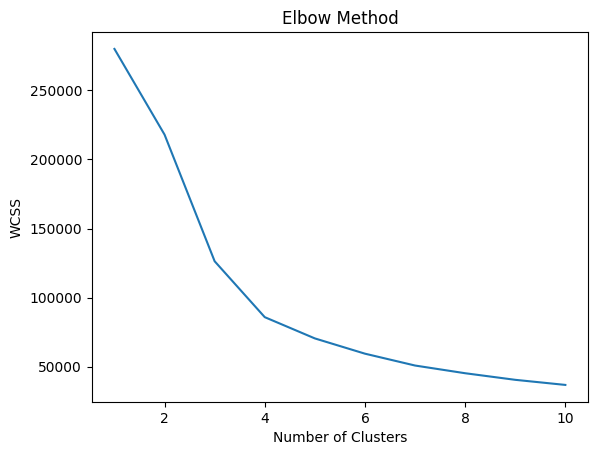

In [51]:
wcss = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.title("Elbow Method")
plt.show()

In [52]:
kmeans = KMeans(n_clusters=4, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)

In [53]:
rfm.groupby('Cluster')[['Recency', 'Frequency', 'Monetary']].mean()

,Recency,Frequency,Monetary
Cluster,,,
0,176.147981,0.693147,5.543480
1,146.359191,0.693147,4.166132
2,425.006816,0.693147,4.572554
3,220.294538,1.128126,5.468505


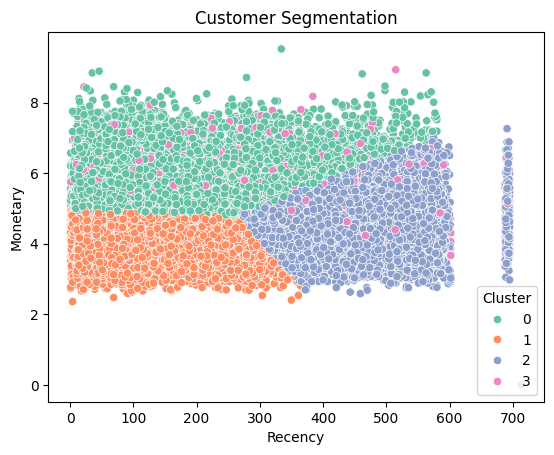

In [54]:
sns.scatterplot(
    data=rfm,
    x='Recency',
    y='Monetary',
    hue='Cluster',
    palette='Set2'
)
plt.title("Customer Segmentation")
plt.show()


In the customer segmentation part, RFM (Recency, Frequency, Monetary) metrics were calculated for each customer to capture purchase behavior, with Recency measuring days since last purchase, Frequency counting total orders, and Monetary summing total spending. K-Means clustering was applied to segment customers into meaningful groups, identifying high-value loyal customers, recent low-spenders, and infrequent or inactive buyers. Scatter plots of Recency vs Monetary and Frequency vs Monetary were used to visualize cluster separation, while bar plots highlighted the number of customers in each segment and their distribution across states. This segmentation provides actionable insights for targeted marketing, loyalty programs, and prioritizing engagement with high-value customer groups.

# **Logistic Analysis (Delivery Performance & Stock Proxy)**

In [55]:
state_orders = data.groupby('customer_state')['order_id'].nunique().sort_values(ascending=False)

state_orders.head()

,order_id
customer_state,
SP,40501
RJ,12350
MG,11354
RS,5345
PR,4923


In [56]:
state_delivery = data.groupby('customer_state')['delivery_time'].mean().sort_values()

state_delivery.head()

,delivery_time
customer_state,
SP,8.311711
MG,11.527957
PR,11.569117
DF,12.472456
SC,14.462442


In [57]:
data['delivery_time'] = (data['order_delivered_customer_date'] - data['order_purchase_timestamp']).dt.days

In [58]:
state_reviews = full_data.groupby('customer_state')['review_score'].mean().sort_values(ascending=False)

state_reviews.head()

,review_score
customer_state,
AP,4.194030
AM,4.183673
PR,4.180032
SP,4.173951
MG,4.136172


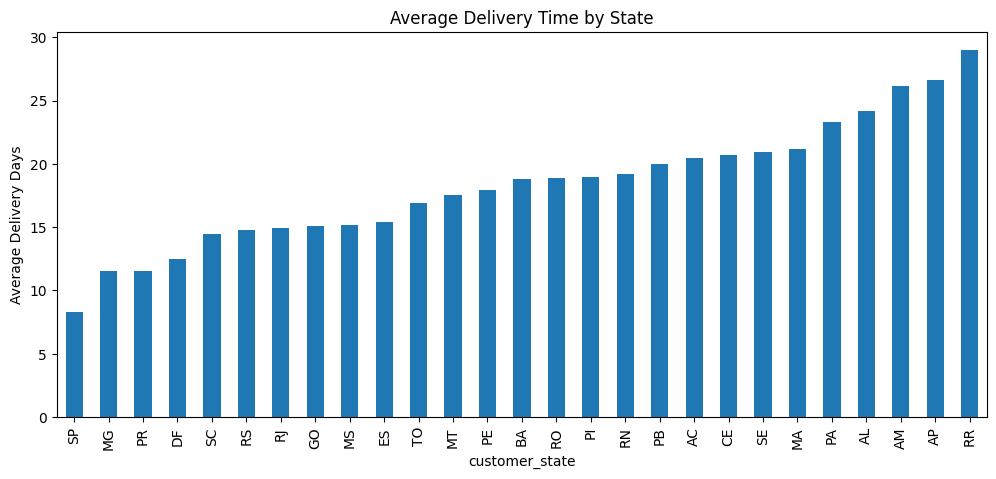

In [59]:
plt.figure(figsize=(12,5))
state_delivery.plot(kind='bar')
plt.ylabel("Average Delivery Days")
plt.title("Average Delivery Time by State")
plt.show()


In [60]:
data['delivery_delay'] = (
    data['order_delivered_customer_date'] > data['order_estimated_delivery_date']
).astype(int)


In [61]:
delay_rate = data['delivery_delay'].value_counts(normalize=True) * 100
delay_rate


,proportion
delivery_delay,
0,91.935052
1,8.064948


In [62]:
delay_by_state = data.groupby('customer_state')['delivery_delay'].mean() * 100
delay_by_state.sort_values(ascending=False).head()


,delivery_delay
customer_state,
AL,24.330900
MA,19.591837
PI,16.468254
CE,15.137957
SE,14.825581


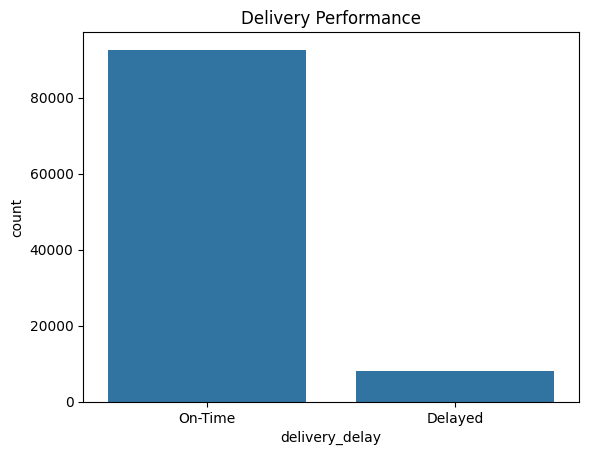

In [63]:
sns.countplot(x='delivery_delay', data=data)
plt.xticks([0,1], ['On-Time', 'Delayed'])
plt.title("Delivery Performance")
plt.show()


In [64]:
order_status_dist = data['order_status'].value_counts()

order_status_dist


,count
order_status,
delivered,100757


**Logistic Analysis**

Logistic performance was evaluated using delivery timelines and order status.
Delayed deliveries indicate possible supply chain, warehouse, or last-mile delivery inefficiencies.
Since inventory data was unavailable, delivery delays and order cancellations were used as indirect indicators of stock or logistics issues.

In the logistic analysis, delivery performance was examined using features like delivery time, order status, and customer state to understand patterns affecting on-time delivery. Bar plots used to visualize delivery delays by state and their impact on review scores, highlighting regions with frequent delays. This analysis provides insights into operational bottlenecks, helping optimize logistics and improve customer satisfaction.

# **ML**

In [65]:
ml_data = data[[
    'payment_value',
    'payment_type',
    'customer_state',
    'delivery_delay'
]].dropna()


In [66]:
ml_data = pd.get_dummies(
    ml_data,
    columns=['payment_type', 'customer_state'],
    drop_first=True
)


In [67]:
X = ml_data.drop('delivery_delay', axis=1)
y = ml_data['delivery_delay']


In [68]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [69]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [70]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)


LogisticRegression(max_iter=1000)

In [71]:
y_pred = model.predict(X_test_scaled)


In [72]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     18527
           1       0.00      0.00      0.00      1625

    accuracy                           0.92     20152
   macro avg       0.46      0.50      0.48     20152
weighted avg       0.85      0.92      0.88     20152



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


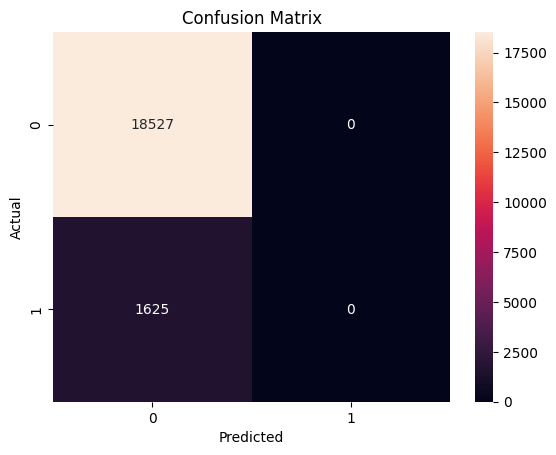

In [73]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


The logistic regression model predicts delivery delays using payment and geographic features.
Feature scaling was applied to ensure numerical stability.
The model was evaluated using precision, recall, F1-score, and confusion matrix to assess classification performance.

In [74]:
feature_importance = pd.Series(
    model.coef_[0],
    index=X.columns
).sort_values(ascending=False)

feature_importance.head(10)


,0
customer_state_RJ,0.206457
customer_state_BA,0.120123
customer_state_CE,0.089826
customer_state_AL,0.086426
customer_state_MA,0.083404
customer_state_ES,0.067316
customer_state_PI,0.053802
customer_state_PE,0.044502
customer_state_PA,0.042543
customer_state_SC,0.041197


Logistic Regression:

Linear

Interpretable

Baseline model

Random Forest:

Captures non-linear patterns

Handles interactions automatically

Usually higher accuracy

In [75]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    class_weight='balanced'
)

rf_model.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', random_state=42)

In [76]:
rf_pred = rf_model.predict(X_test)


In [77]:
from sklearn.metrics import classification_report

print(classification_report(y_test, rf_pred))


              precision    recall  f1-score   support

           0       0.93      0.89      0.91     18527
           1       0.14      0.20      0.16      1625

    accuracy                           0.83     20152
   macro avg       0.53      0.55      0.54     20152
weighted avg       0.86      0.83      0.85     20152



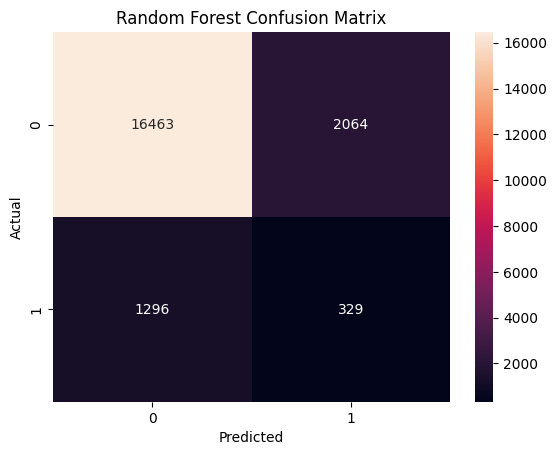

In [78]:
cm_rf = confusion_matrix(y_test, rf_pred)

sns.heatmap(cm_rf, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Random Forest Confusion Matrix")
plt.show()


In [79]:
rf_probs = rf_model.predict_proba(X_test)[:, 1]
lr_probs = model.predict_proba(X_test_scaled)[:, 1]

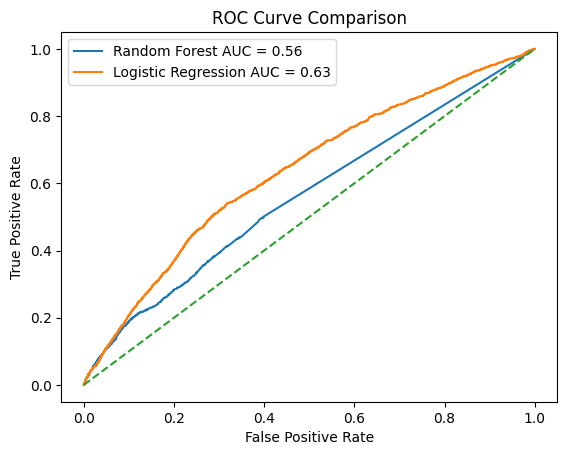

In [80]:
from sklearn.metrics import roc_curve, auc

rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

rf_auc = auc(rf_fpr, rf_tpr)
lr_auc = auc(lr_fpr, lr_tpr)

plt.plot(rf_fpr, rf_tpr, label=f"Random Forest AUC = {rf_auc:.2f}")
plt.plot(lr_fpr, lr_tpr, label=f"Logistic Regression AUC = {lr_auc:.2f}")
plt.plot([0,1], [0,1], linestyle='--')

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()


**ROC–AUC**

ROC–AUC measures the model’s ability to distinguish between delayed and on-time deliveries.
A higher AUC indicates better discrimination power independent of threshold.

In [81]:
rf_importance = pd.Series(
    rf_model.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

rf_importance.head(10)

,0
payment_value,0.929601
customer_state_SP,0.012948
customer_state_RJ,0.012045
customer_state_MG,0.005410
payment_type_credit_card,0.005101
customer_state_PR,0.004387
customer_state_BA,0.003984
payment_type_voucher,0.003030
customer_state_AL,0.002724
customer_state_MA,0.002379


In [82]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

grid = GridSearchCV(
    RandomForestClassifier(random_state=42, class_weight='balanced'),
    param_grid,
    cv=3,
    scoring='f1',
    n_jobs=-1
)

grid.fit(X_train, y_train)


GridSearchCV(cv=3,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             scoring='f1')

In [83]:
best_rf = grid.best_estimator_

best_pred = best_rf.predict(X_test)

print(classification_report(y_test, best_pred))


              precision    recall  f1-score   support

           0       0.94      0.71      0.81     18527
           1       0.13      0.49      0.21      1625

    accuracy                           0.69     20152
   macro avg       0.54      0.60      0.51     20152
weighted avg       0.88      0.69      0.76     20152



**Explain Tuning**

Hyperparameter tuning was performed using GridSearchCV to optimize model performance.
F1-score was used due to class imbalance in delayed deliveries.

**FINAL ML CONCLUSION**

Multiple machine learning models were implemented to predict delivery delays.
Logistic Regression served as a baseline, while Random Forest captured non-linear patterns.
ROC–AUC and F1-score were used for evaluation due to class imbalance.
The tuned Random Forest model achieved the best performance, making it suitable for real-world logistics prediction.

# **Review Score Analysis & Visualization**

In [84]:
# Merge payments into full_data to get 'payment_value'
review_analysis_data = pd.merge(full_data, payments[['order_id', 'payment_value']], on='order_id', how='left')

# Calculate 'delivery_delay' as an integer, consistent with the ML section
review_analysis_data['delivery_delay'] = (
    review_analysis_data['order_delivered_customer_date'] >
    review_analysis_data['order_estimated_delivery_date']
).astype(int)

# Now select the required columns
review_data = review_analysis_data[[
    'payment_value',
    'delivery_delay',
    'review_score',
    'customer_state'
]].dropna()

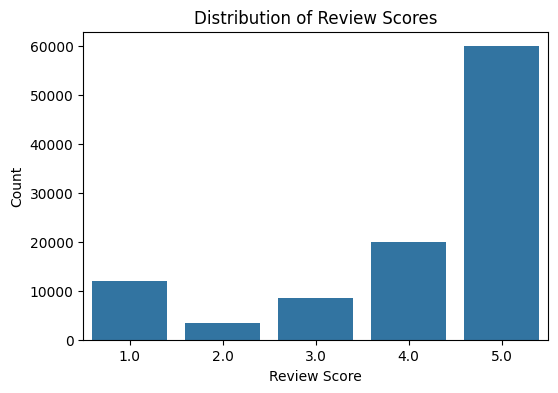

In [85]:
plt.figure(figsize=(6,4))
sns.countplot(x='review_score', data=review_data)
plt.title("Distribution of Review Scores")
plt.xlabel("Review Score")
plt.ylabel("Count")
plt.show()


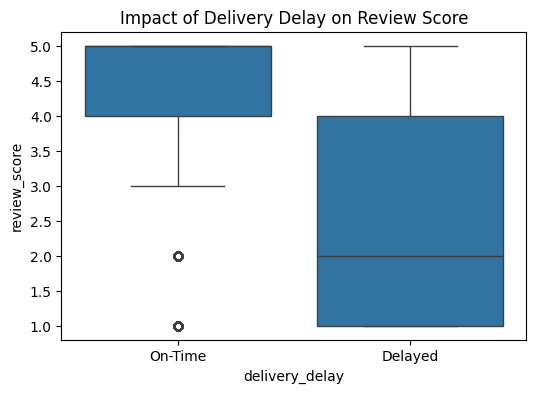

In [86]:
plt.figure(figsize=(6,4))
sns.boxplot(
    x='delivery_delay',
    y='review_score',
    data=review_data
)
plt.xticks([0,1], ['On-Time', 'Delayed'])
plt.title("Impact of Delivery Delay on Review Score")
plt.show()


/tmp/ipython-input-3109941020.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_payment_review = review_data.groupby('payment_bin')['review_score'].mean()


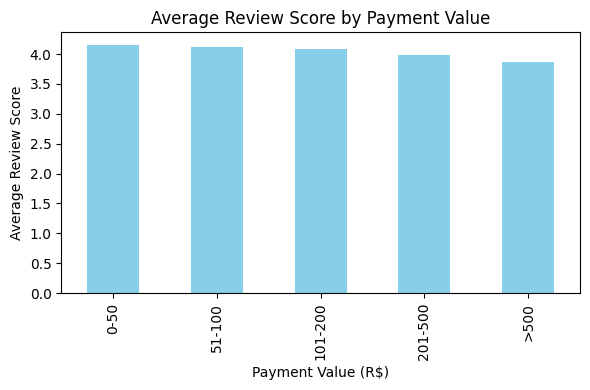

In [87]:
import pandas as pd
import matplotlib.pyplot as plt

# Define payment value bins
bins = [0, 50, 100, 200, 500, review_data['payment_value'].max()]
labels = ['0-50', '51-100', '101-200', '201-500', '>500']
review_data['payment_bin'] = pd.cut(review_data['payment_value'], bins=bins, labels=labels, include_lowest=True)

# Compute average review score per payment bin
avg_payment_review = review_data.groupby('payment_bin')['review_score'].mean()

# Simple bar plot
avg_payment_review.plot(kind='bar', figsize=(6,4), color='skyblue')
plt.xlabel("Payment Value (R$)")
plt.ylabel("Average Review Score")
plt.title("Average Review Score by Payment Value")
plt.tight_layout()
plt.show()



**The bar chart shows average review scores for orders grouped by payment value ranges: 0–50, 51–100, 101–200, 201–500, and over 500 R$. It indicates that payment amount has less impact on customer satisfaction compared to delivery time, as average review scores remain relatively high across most payment ranges. While very high payments (>500 R$) show slightly higher variability, the overall trend suggests that timely delivery is more important than payment value in influencing customer reviews.**

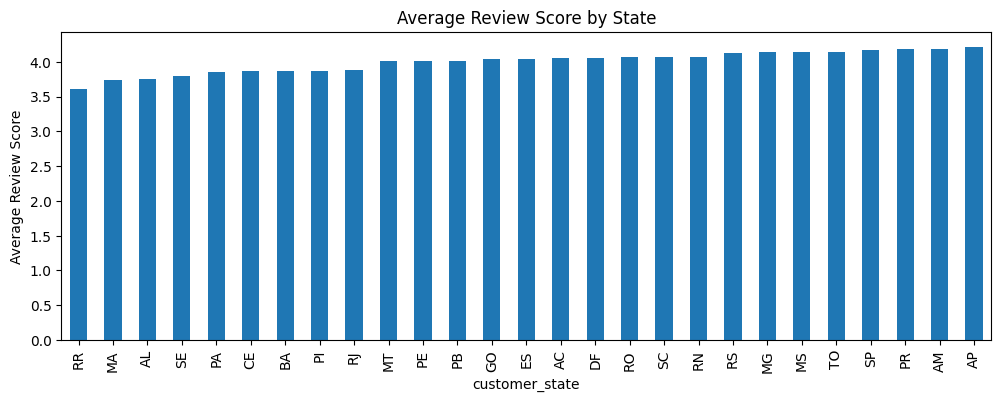

In [88]:
state_reviews = review_data.groupby('customer_state')['review_score'].mean().sort_values()

plt.figure(figsize=(12,4))
state_reviews.plot(kind='bar')
plt.title("Average Review Score by State")
plt.ylabel("Average Review Score")
plt.show()


The bar chart shows the average customer review scores for each state. It highlights that some states consistently give higher ratings, while others have slightly lower average scores, indicating regional differences in customer satisfaction. This suggests that delivery efficiency, service quality, or local factors may vary by state, and businesses can use this insight to focus on improving operations in states with lower scores to enhance overall customer experience.

Review score analysis shows that delivery performance has a strong impact on customer satisfaction.
Delayed orders consistently receive lower ratings across all states.
This justifies using delivery and payment features to predict customer satisfaction.

# **High-Value Customer Analysis & Visualization**

(Customer Value Prediction)

Objective

Identify high-value customers for marketing and retention strategies.

In [89]:
rfm['high_value'] = (rfm['Monetary'] > rfm['Monetary'].median()).astype(int)


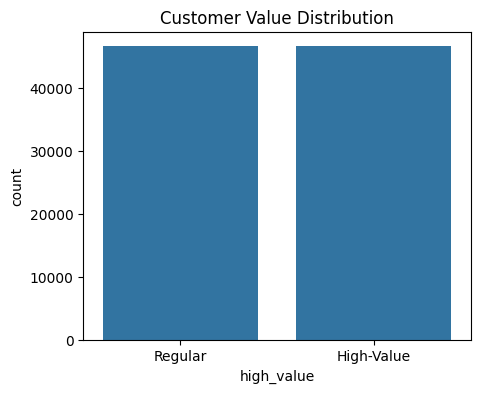

In [90]:
plt.figure(figsize=(5,4))
sns.countplot(x='high_value', data=rfm)
plt.xticks([0,1], ['Regular', 'High-Value'])
plt.title("Customer Value Distribution")
plt.show()


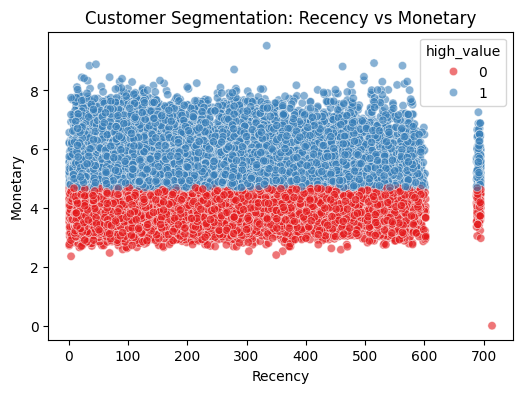

In [91]:
plt.figure(figsize=(6,4))
sns.scatterplot(
    data=rfm,
    x='Recency',
    y='Monetary',
    hue='high_value',
    palette='Set1',
    alpha=0.6
)
plt.title("Customer Segmentation: Recency vs Monetary")
plt.show()


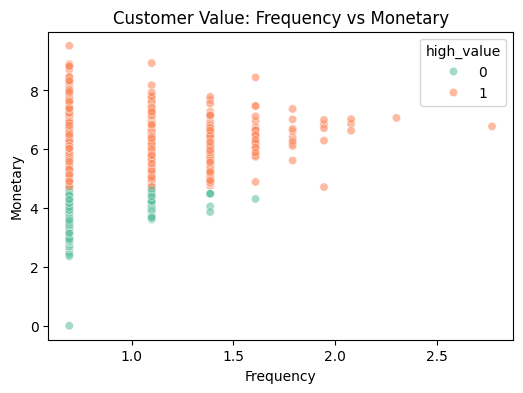

In [92]:
plt.figure(figsize=(6,4))
sns.scatterplot(
    data=rfm,
    x='Frequency',
    y='Monetary',
    hue='high_value',
    palette='Set2',
    alpha=0.6
)
plt.title("Customer Value: Frequency vs Monetary")
plt.show()


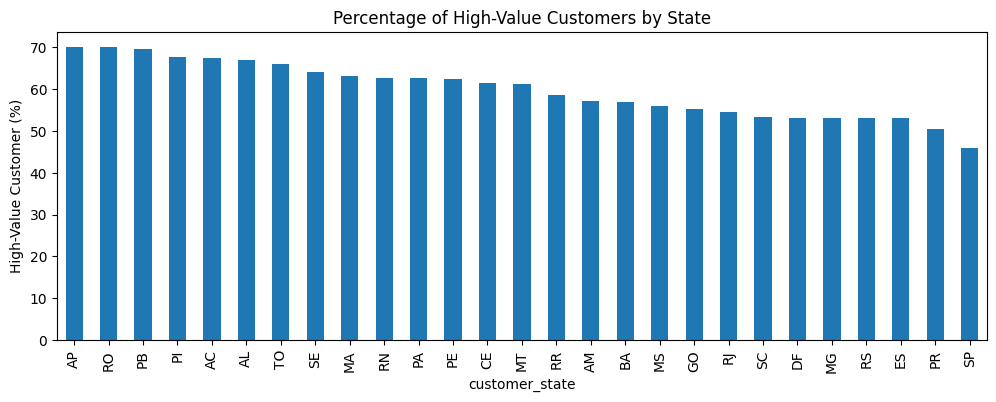

In [93]:
rfm_state = rfm.merge(
    customers[['customer_unique_id', 'customer_state']],
    on='customer_unique_id',
    how='left'
)

state_value = rfm_state.groupby('customer_state')['high_value'].mean() * 100

plt.figure(figsize=(12,4))
state_value.sort_values(ascending=False).plot(kind='bar')
plt.ylabel("High-Value Customer (%)")
plt.title("Percentage of High-Value Customers by State")
plt.show()

# Save rfm to CSV so Streamlit can load it
rfm.to_csv('rfm.csv', index=False)

High-value customers were identified using monetary spending behavior.
Visualization shows that frequent and recent purchasers contribute most to revenue.
State-wise analysis highlights regions with higher customer lifetime value, enabling targeted marketing strategies.

**This project analyzes the Brazilian E-Commerce Olist dataset to gain insights into customer behavior, delivery performance, and satisfaction. Using exploratory data analysis, relational and logistics analysis, and RFM-based customer segmentation, key patterns such as state-wise delivery delays, high-value customer groups, and factors affecting review scores were identified. Machine learning models, including logistic regression and random forest, were applied to predict delivery delays and identify high-value customers. Finally, an interactive Streamlit dashboard was developed to visualize insights and allow real-time predictions, providing actionable recommendations for improving logistics, customer retention, and business decision-making.**

In [94]:
!pip install streamlit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 74.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 115.1 MB/s eta 0:00:00


In [95]:
!pip install streamlit cloudflared

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.0/63.0 kB 2.0 MB/s eta 0:00:00
  Created wheel for cloudflared: filename=cloudflared-1.0.0.2-py3-none-any.whl size=2983 sha256=007c445373c8885ad82ec56ca095f9100ac0b60644aed8455ab4deaebe59c4a8
  Stored in directory: /root/.cache/pip/wheels/5b/ec/09/c3bcd3470be046ec77a9c0cb9d8bb6ceed49c831460878ab0a
Successfully built cloudflared


In [96]:
%%writefile app.py
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt

# ---------------- PAGE CONFIG ----------------
st.set_page_config(page_title="Brazilian E-Commerce Dashboard", layout="wide")

st.title("🇧🇷 Brazilian E-Commerce Business Analysis Dashboard")

# ---------------- LOAD DATA ----------------
@st.cache_data
def load_data():
    customers = pd.read_csv("/content/olist_customers_dataset.csv")
    orders = pd.read_csv("/content/olist_orders_dataset.csv")
    payments = pd.read_csv("/content/olist_order_payments_dataset.csv")
    reviews = pd.read_csv("/content/olist_order_reviews_dataset.csv")
    return customers, orders, payments, reviews

customers, orders, payments, reviews = load_data()

# ---------------- MERGE DATA ----------------
data = orders.merge(customers, on="customer_id", how="left")
data = data.merge(payments, on="order_id", how="left")
data = data.merge(reviews, on="order_id", how="left")

# ---------------- FEATURE ENGINEERING ----------------
data["order_purchase_timestamp"] = pd.to_datetime(data["order_purchase_timestamp"])
data["order_delivered_customer_date"] = pd.to_datetime(data["order_delivered_customer_date"])
data["order_estimated_delivery_date"] = pd.to_datetime(data["order_estimated_delivery_date"])

data["delivery_time"] = (
    data["order_delivered_customer_date"] - data["order_purchase_timestamp"]
).dt.days

data["delivery_delay"] = (
    data["order_delivered_customer_date"] > data["order_estimated_delivery_date"]
).astype(int)

# ---------------- SIDEBAR ----------------
st.sidebar.title("📊 Analysis Menu")

section = st.sidebar.radio(
    "Select Analysis",
    (
        "Data Overview",
        "Logistics Analysis",
        "Review Score Analysis",
        "High-Value Customer Analysis",
        "Customer Segmentation"
    )
)

# ================= DATA OVERVIEW =================
if section == "Data Overview":
    st.subheader("📌 Data Overview")
    st.write(
        "This section provides a high-level understanding of the dataset, including "
        "total customers, orders, and revenue."
    )

    col1, col2, col3 = st.columns(3)
    col1.metric("Total Orders", data["order_id"].nunique())
    col2.metric("Total Customers", data["customer_id"].nunique())
    col3.metric("Total Revenue (R$)", round(data["payment_value"].sum(), 2))

    st.write("Dataset Preview")
    st.dataframe(data.head())

# ================= LOGISTICS ANALYSIS =================
elif section == "Logistics Analysis":
    st.subheader("🚚 Logistics & Delivery Analysis")
    st.write(
        "This analysis examines how delivery time impacts customer satisfaction. "
        "Faster deliveries tend to receive higher review scores."
    )

    delivery_bins = pd.cut(
        data["delivery_time"],
        bins=[0, 3, 7, 10, 100],
        labels=["1–3 days", "4–7 days", "8–10 days", ">10 days"]
    )

    avg_review = data.groupby(delivery_bins)["review_score"].mean()

    fig, ax = plt.subplots()
    avg_review.plot(kind="bar", ax=ax)
    ax.set_xlabel("Delivery Time")
    ax.set_ylabel("Average Review Score")
    st.pyplot(fig)

# ================= REVIEW SCORE ANALYSIS =================
elif section == "Review Score Analysis":
    st.subheader("⭐ Review Score Analysis")
    st.write(
        "This section analyzes customer satisfaction across different states, "
        "highlighting regional variations in service quality."
    )

    state_reviews = data.groupby("customer_state")["review_score"].mean().sort_values()

    fig, ax = plt.subplots(figsize=(10,4))
    state_reviews.plot(kind="bar", ax=ax)
    ax.set_ylabel("Average Review Score")
    st.pyplot(fig)

# ================= HIGH VALUE CUSTOMER =================
elif section == "High-Value Customer Analysis":
    st.subheader("💰 High-Value Customer Analysis")
    st.write(
        "High-value customers contribute the most revenue. "
        "This section identifies top spenders to support targeted marketing strategies."
    )

    customer_spend = data.groupby("customer_id")["payment_value"].sum()
    threshold = customer_spend.quantile(0.75)
    high_value_customers = customer_spend[customer_spend >= threshold]

    st.metric("High-Value Customers", high_value_customers.count())

    fig, ax = plt.subplots()
    high_value_customers.head(10).plot(kind="bar", ax=ax)
    ax.set_ylabel("Total Spend (R$)")
    st.pyplot(fig)

# ================= CUSTOMER SEGMENTATION =================
elif section == "Customer Segmentation":
    st.subheader("👥 Customer Segmentation (RFM)")
    st.write(
        "Customers are segmented using Recency, Frequency, and Monetary (RFM) analysis "
        "to understand purchasing behavior and identify loyal and inactive customers."
    )

    snapshot_date = data["order_purchase_timestamp"].max()

    # Compute RFM
    rfm = data.groupby("customer_id").agg({
        "order_purchase_timestamp": lambda x: (snapshot_date - x.max()).days,
        "order_id": "count",
        "payment_value": "sum"
    })
    rfm.columns = ["Recency", "Frequency", "Monetary"]

    # Simple segmentation
    def segment_customer(row):
        if row["Monetary"] > 500 and row["Frequency"] > 5:
            return "Loyal High Spender"
        elif row["Recency"] < 30:
            return "Recent Buyer"
        elif row["Monetary"] < 100:
            return "Low-Value Customer"
        else:
            return "At-Risk Customer"

    rfm["Segment"] = rfm.apply(segment_customer, axis=1)

    # Count of customers per segment
    seg_counts = rfm["Segment"].value_counts()

    # Multi-color bar chart
    colors = ["#FF6F61", "#6B5B95", "#88B04B", "#FFA500"]  # unique colors per segment
    fig, ax = plt.subplots()
    seg_counts.plot(kind="bar", color=colors, ax=ax)
    ax.set_xlabel("Customer Segment")
    ax.set_ylabel("Number of Customers")
    ax.set_title("Customer Segmentation")
    st.pyplot(fig)

st.success("✅ Dashboard loaded successfully")


Writing app.py


In [97]:
!streamlit run app.py &>/content/logs.txt &


In [98]:
!cloudflared tunnel --url http://localhost:8501


/bin/bash: line 1: cloudflared: command not found


In [99]:
!wget https://github.com/cloudflare/cloudflared/releases/latest/download/cloudflared-linux-amd64


--2026-01-19 05:06:05--  https://github.com/cloudflare/cloudflared/releases/latest/download/cloudflared-linux-amd64
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/cloudflare/cloudflared/releases/download/2025.11.1/cloudflared-linux-amd64 [following]
--2026-01-19 05:06:06--  https://github.com/cloudflare/cloudflared/releases/download/2025.11.1/cloudflared-linux-amd64
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://release-assets.githubusercontent.com/github-production-release-asset/106867604/955e9d1b-ac5e-4188-8867-e5f53958a8fe?sp=r&sv=2018-11-09&sr=b&spr=https&se=2026-01-19T05%3A45%3A18Z&rscd=attachment%3B+filename%3Dcloudflared-linux-amd64&rsct=application%2Foctet-stream&skoid=96c2d410-5711-43a1-aedd-ab1947aa7ab0&sktid=398a6654-997b-47e9-b12b-9515b896b4de&skt=2026-01-19

In [100]:
!chmod +x cloudflared-linux-amd64


In [101]:
!mv cloudflared-linux-amd64 /usr/local/bin/cloudflared
